# ⏳ Stay Length Prediction Model
This notebook builds a regression model to predict the follow-up duration (`time`) of heart failure patients.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import joblib

sns.set(style='whitegrid')

## 📥 Load Dataset and Prepare Features

In [4]:
df = pd.read_csv('E:/hospital_analytics_project/data/raw/heart_failure_clinical_records_dataset.csv')

# Feature engineering
df['is_elderly'] = (df['age'] > 65).astype(int)
df['low_ejection'] = (df['ejection_fraction'] < 30).astype(int)
df['high_creatinine'] = (df['serum_creatinine'] > 1.5).astype(int)
df['combined_risk_score'] = df['is_elderly'] + df['low_ejection'] + df['high_creatinine']

# Define features and target for regression
y = df['time']
X = df.drop(columns=['time', 'DEATH_EVENT'])

## ✂️ Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Train Gradient Boosting Regressor

In [6]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 📊 Evaluation Metrics

In [7]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 68.14
RMSE: 81.72
R² Score: -0.22


## 📈 Predicted vs Actual Plot

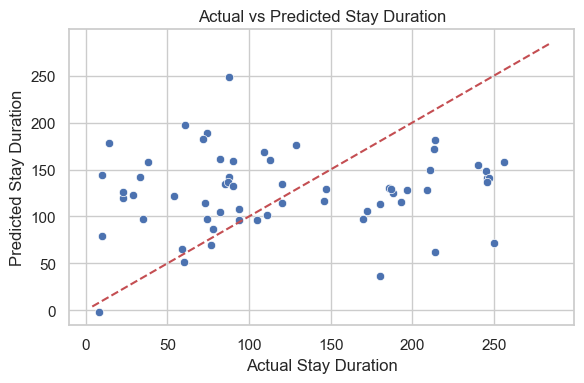

In [8]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Stay Duration')
plt.ylabel('Predicted Stay Duration')
plt.title('Actual vs Predicted Stay Duration')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
plt.grid(True)
plt.tight_layout()
plt.show()

## 💾 Save the Model

In [9]:
joblib.dump(model, 'E:/hospital_analytics_project/models/stay_length_model.pkl')
print("Model saved to E:/hospital_analytics_project/models/stay_length_model.pkl")

Model saved to E:/hospital_analytics_project/models/stay_length_model.pkl
